In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

In [2]:
student=pd.read_csv("Student_performance_data _.csv")

In [3]:
student.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [4]:
student.shape

(2392, 15)

In [5]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [6]:
student.isnull().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

In [7]:
student.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


<Axes: >

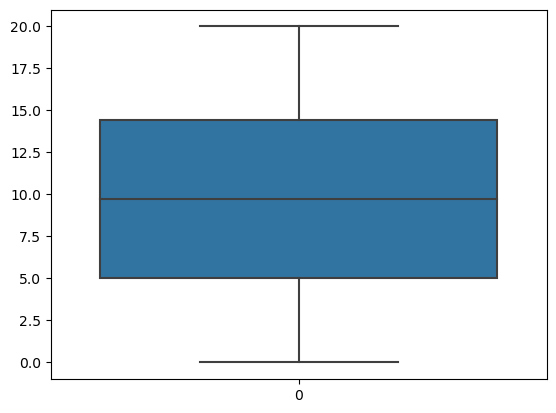

In [8]:
sns.boxplot(student['StudyTimeWeekly'])

<Axes: >

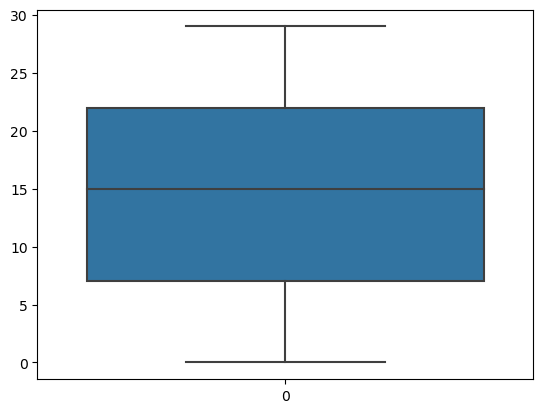

In [9]:
sns.boxplot(student['Absences'])

<Axes: >

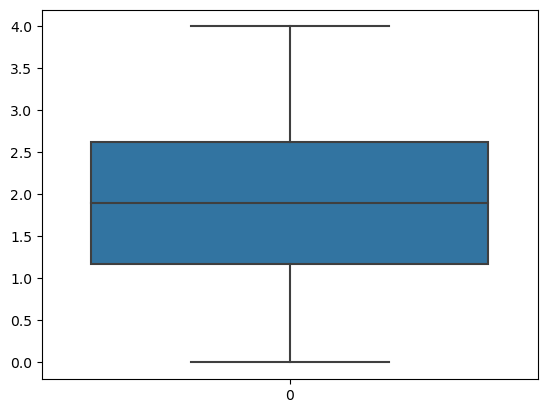

In [10]:
sns.boxplot(student['GPA'])

Univate analysis.

<Axes: ylabel='count'>

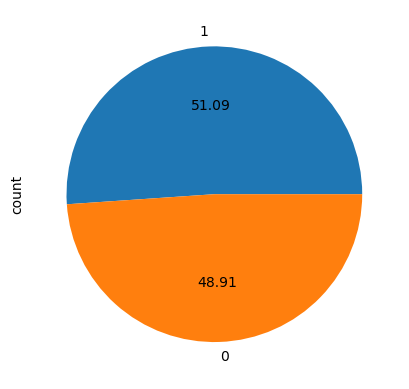

In [11]:
student['Gender'].value_counts().plot(kind='pie',autopct='%.2f')

<Axes: xlabel='Age'>

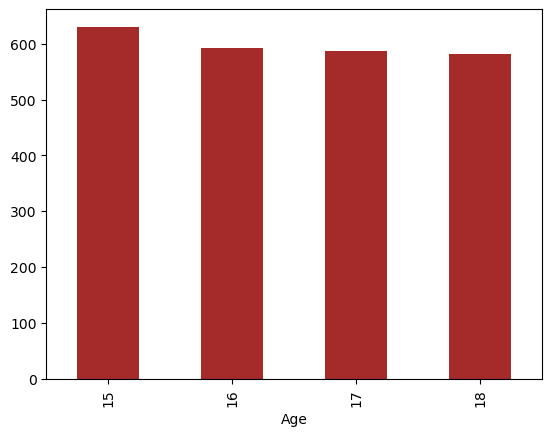

In [12]:
student['Age'].value_counts().plot(kind='bar',color='brown')

<Axes: xlabel='Ethnicity'>

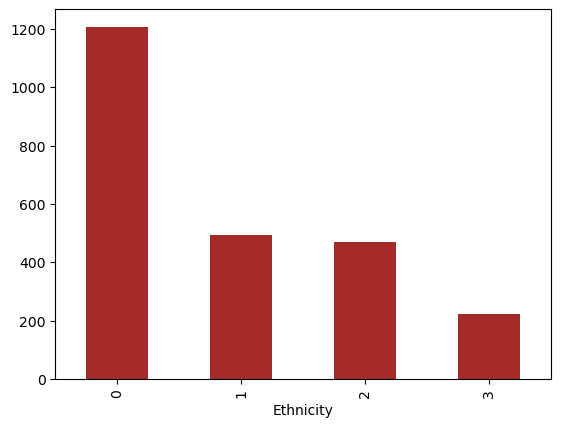

In [13]:
student['Ethnicity'].value_counts().plot(kind='bar',color='brown')

<Axes: xlabel='ParentalEducation'>

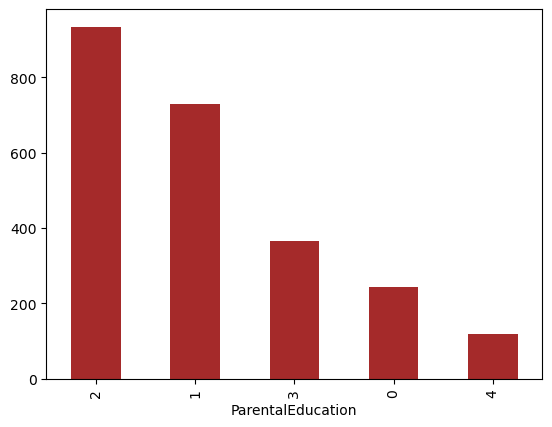

In [14]:
student['ParentalEducation'].value_counts().plot(kind='bar',color='brown')

<Axes: xlabel='ParentalSupport'>

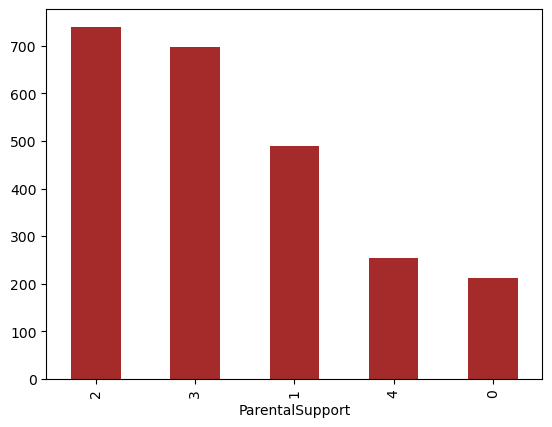

In [15]:
student['ParentalSupport'].value_counts().plot(kind='bar',color='brown')

Bivarte analysis

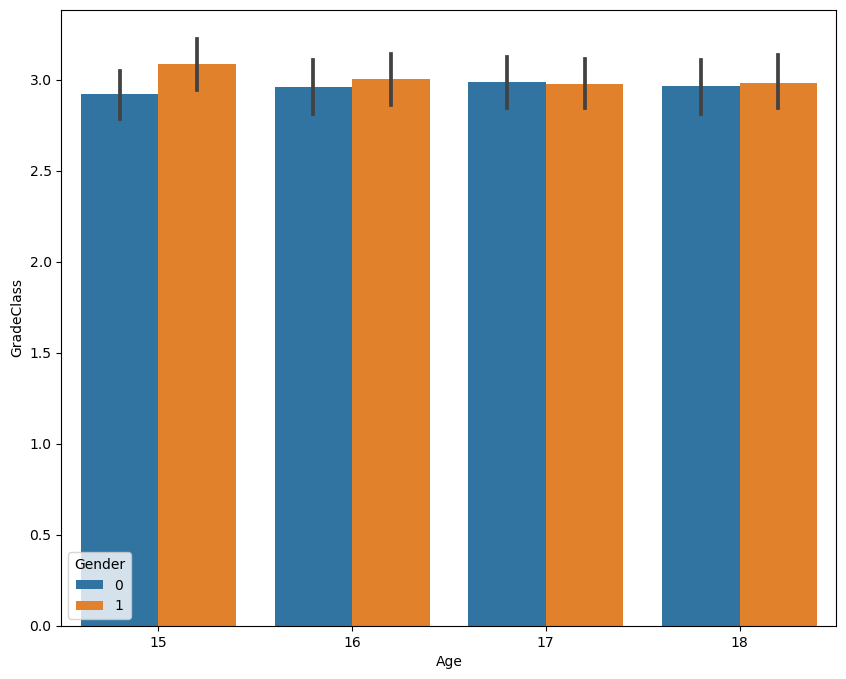

In [16]:
plt.figure(figsize=(10,8))
sns.barplot(x='Age',y='GradeClass',hue='Gender',data=student)
plt.show()

Girls have higher grade to the boys at age 15,16 ,18

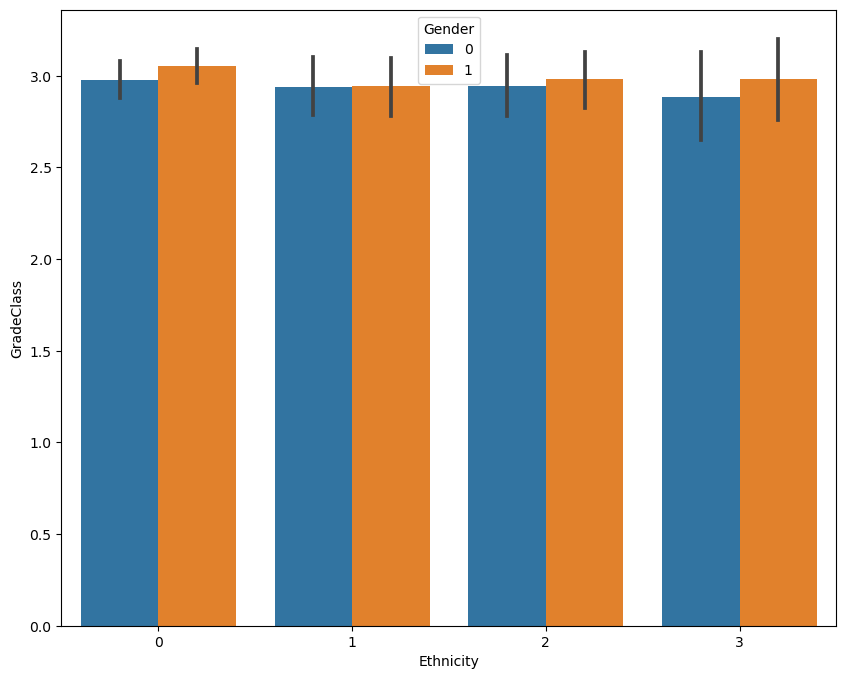

In [17]:
plt.figure(figsize=(10,8))
sns.barplot(x='Ethnicity',y='GradeClass',hue='Gender',data=student)
plt.show()

Girls have higher grade at all ethnicity compare to boys.

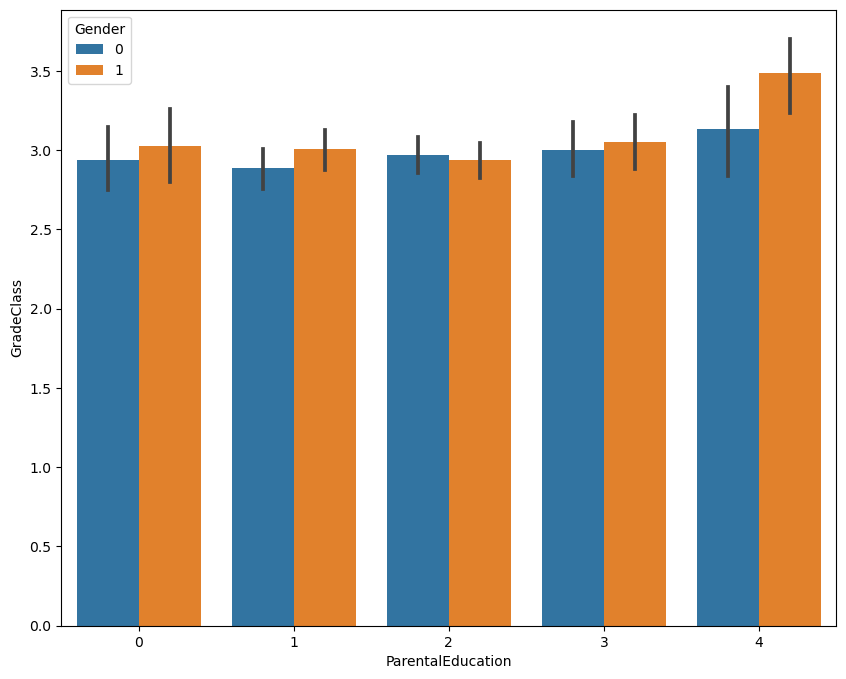

In [18]:
plt.figure(figsize=(10,8))
sns.barplot(x='ParentalEducation',y='GradeClass',hue='Gender',data=student)
plt.show()

ParentalEducation is directly proptional to grade for all students.

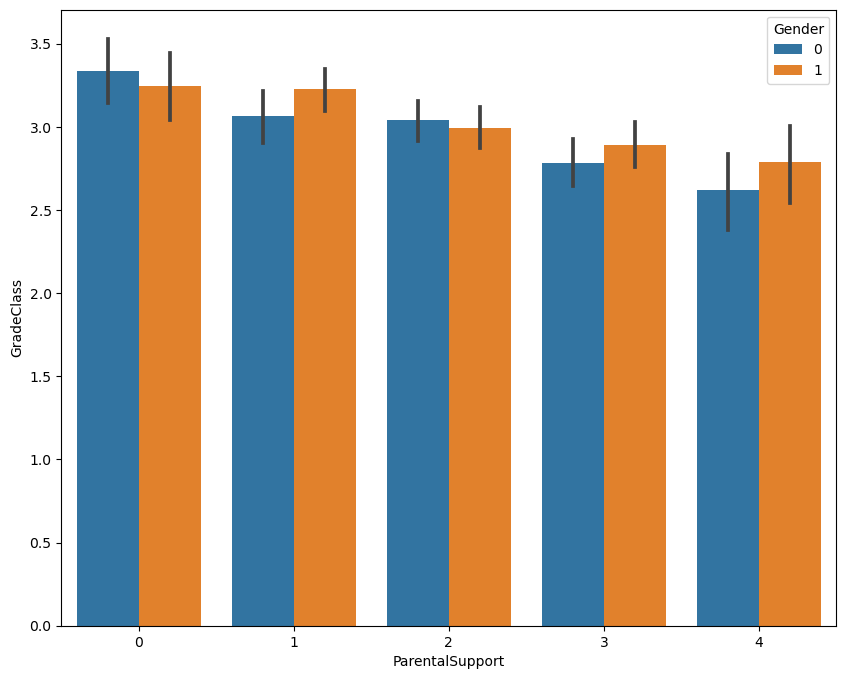

In [19]:
plt.figure(figsize=(10,8))
sns.barplot(x='ParentalSupport',y='GradeClass',hue='Gender',data=student)
plt.show()

Interesting thing is that Stuednt have parents support very high is have less grade.

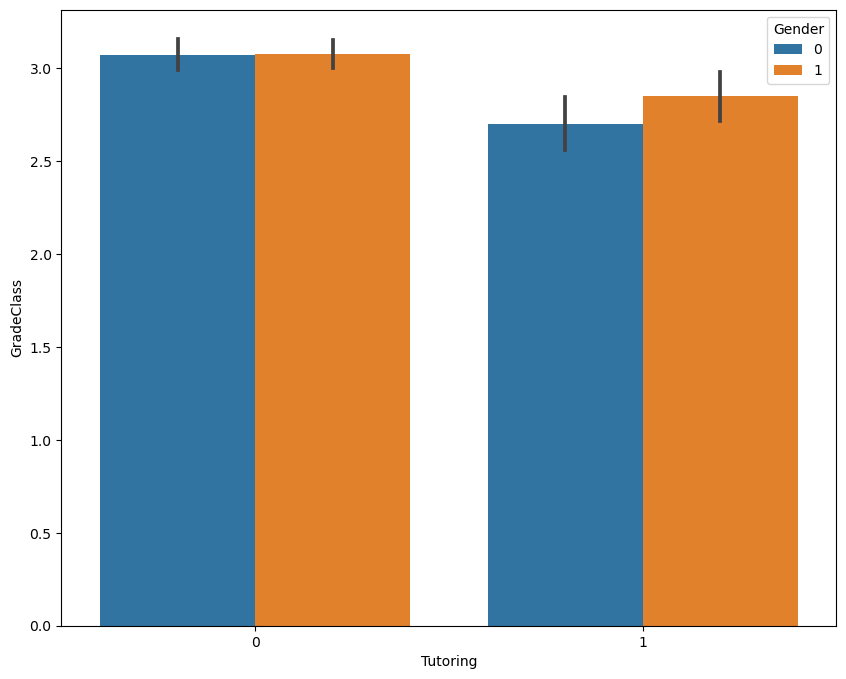

In [20]:
plt.figure(figsize=(10,8))
sns.barplot(x='Tutoring',y='GradeClass',hue='Gender',data=student)
plt.show()

Those student taking tutions have less grade compare to which have not taken tution. 

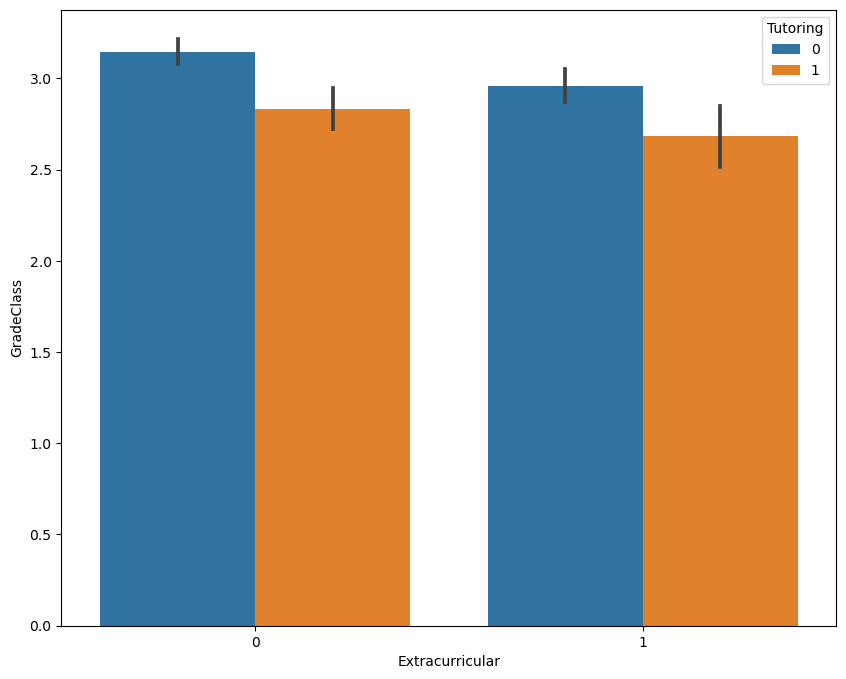

In [21]:
plt.figure(figsize=(10,8))
sns.barplot(x='Extracurricular',y='GradeClass',hue='Tutoring',data=student)
plt.show()

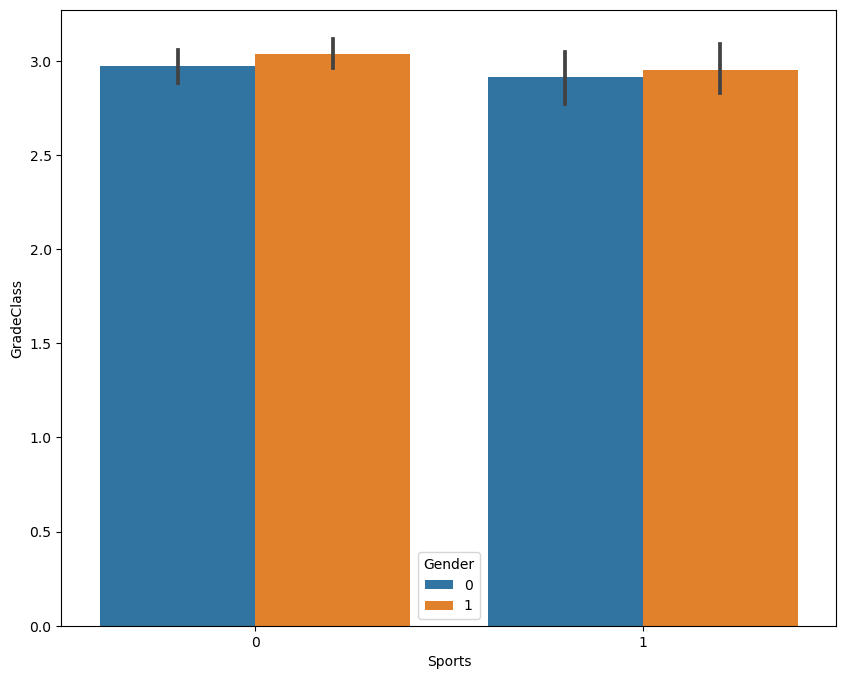

In [22]:
plt.figure(figsize=(10,8))
sns.barplot(x='Sports',y='GradeClass',hue='Gender',data=student)
plt.show()

<Axes: xlabel='GradeClass'>

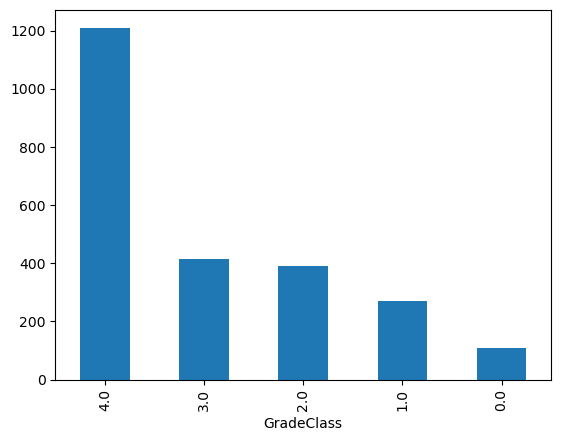

In [23]:
student['GradeClass'].value_counts().plot(kind='bar')

<Axes: >

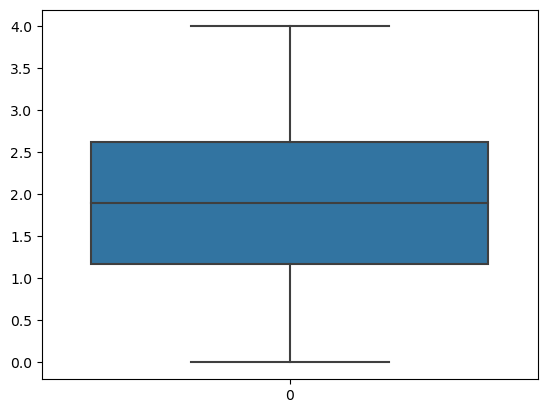

In [24]:
sns.boxplot(student['GPA'])

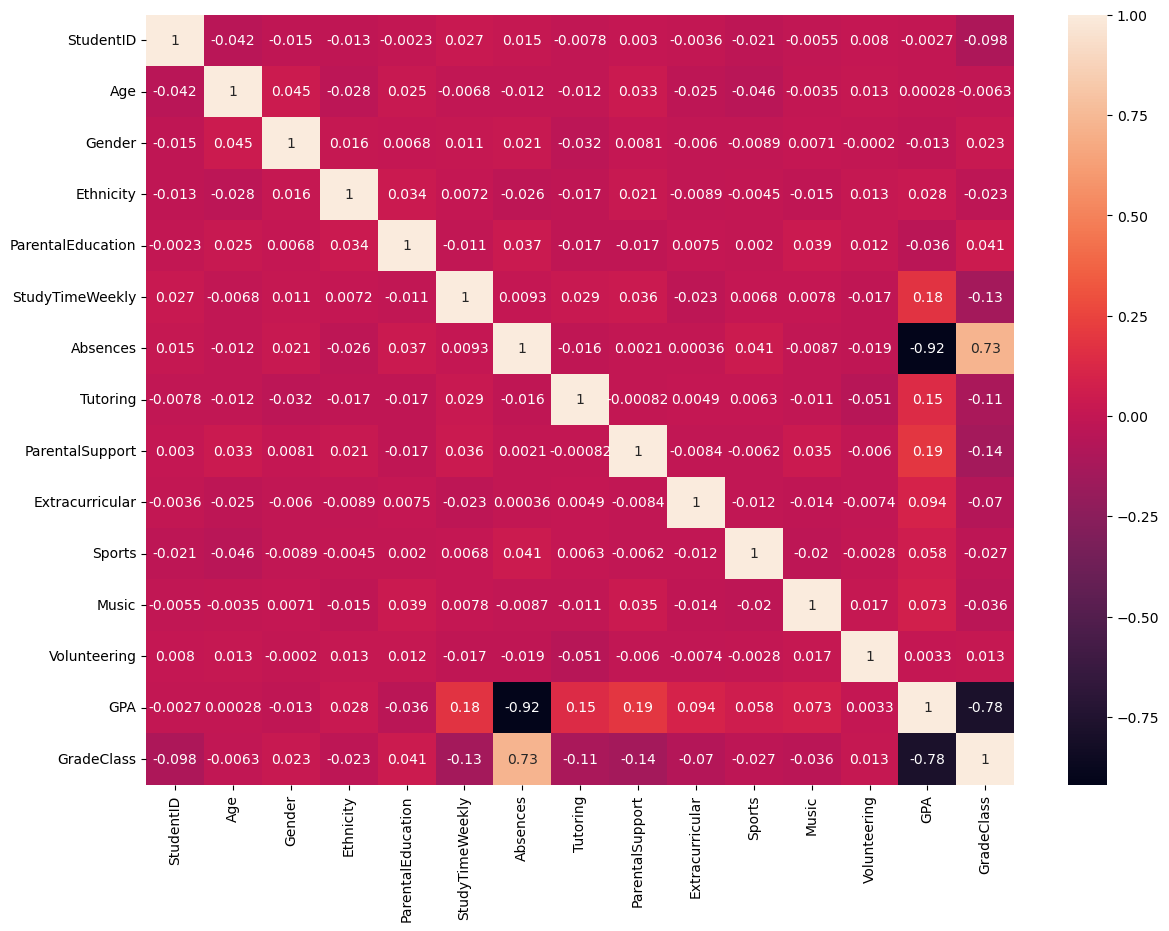

In [25]:
plt.figure(figsize=(14,10))
sns.heatmap(student.corr(),annot=True)
plt.show()

In [26]:
student=student.drop(columns=['StudentID'],axis=1)

In [27]:
x=student.drop(columns=['GradeClass'])
y=student['GradeClass']

In [28]:
x.shape,y.shape

((2392, 13), (2392,))

In [29]:
sc = StandardScaler()

In [30]:
x=sc.fit_transform(x)

In [31]:
from imblearn.over_sampling import RandomOverSampler
smk = RandomOverSampler(random_state=42)
x_res,y_res = smk.fit_resample(x,y)

In [32]:
x_train,x_test,y_train,y_test = train_test_split(x_res,y_res,test_size=0.2,random_state=50)

In [33]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4844, 13)
(1211, 13)
(4844,)
(1211,)


In [34]:
para = {'C':[0.1,1,10,100],
        "gamma":[1,0.1,0.01,0.001],
        "kernel":['rbf']}
rs = RandomizedSearchCV(SVC(),param_distributions=para,verbose=3)
rs.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ........C=100, gamma=1, kernel=rbf;, score=0.940 total time=   1.8s
[CV 2/5] END ........C=100, gamma=1, kernel=rbf;, score=0.926 total time=   1.7s
[CV 3/5] END ........C=100, gamma=1, kernel=rbf;, score=0.929 total time=   1.8s
[CV 4/5] END ........C=100, gamma=1, kernel=rbf;, score=0.936 total time=   1.8s
[CV 5/5] END ........C=100, gamma=1, kernel=rbf;, score=0.920 total time=   1.7s
[CV 1/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.690 total time=   2.3s
[CV 2/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.714 total time=   2.5s
[CV 3/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.718 total time=   2.5s
[CV 4/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.705 total time=   2.3s
[CV 5/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.718 total time=   2.4s
[CV 1/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.654 total time=   2.6s
[CV 2/5] END .....C=10, gamma=0.001, kernel=rbf;

RandomizedSearchCV(estimator=SVC(),
                   param_distributions={'C': [0.1, 1, 10, 100],
                                        'gamma': [1, 0.1, 0.01, 0.001],
                                        'kernel': ['rbf']},
                   verbose=3)

In [35]:
pred = rs.predict(x_test)

In [36]:
acc = accuracy_score(y_test,pred)
print(acc)

0.9388934764657308


In [37]:
from sklearn.metrics import classification_report

In [38]:
report = classification_report(y_test,pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.98       231
         1.0       0.94      0.99      0.96       250
         2.0       0.97      0.90      0.93       237
         3.0       0.92      0.89      0.90       244
         4.0       0.92      0.91      0.92       249

    accuracy                           0.94      1211
   macro avg       0.94      0.94      0.94      1211
weighted avg       0.94      0.94      0.94      1211



In [39]:
cm = confusion_matrix(y_test,pred)

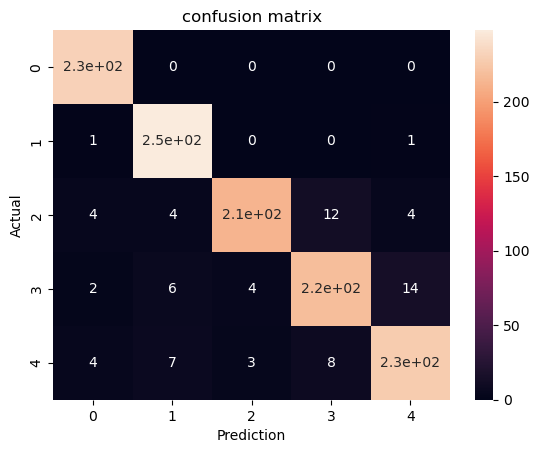

In [40]:
sns.heatmap(cm,annot=True)
plt.ylabel("Actual")
plt.xlabel("Prediction")    
plt.title("confusion matrix")
plt.show()